## PROJETO 2 - CIÊNCIA DOS DADOS

Alunos: Ykaro de Sousa Andrade
Rodrigo de Lima Azeredo

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [69]:
dados = pd.read_csv('water_potability.csv')
dados

#  Link para a bse de dados https://www.kaggle.com/adityakadiwal/water-potability

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [70]:
dados.isnull().sum() # valores nulos no dataset (isso prejudica minha informação) 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [71]:
# A função dropna () do Pandas DataFrame é usada para remover linhas e colunas com valores Null / NaN
dados = dados.dropna()
dados.shape

(2011, 10)

In [72]:
dados.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [73]:
dados.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [74]:
# como só temos dados numéricos, utilizar scatter plot
# Vamos visualizar algumas medidas numéricas em relação a potabilidade da água
potavel = dados.loc[dados.Potability == 1, :]
n_potavel = dados.loc[dados.Potability == 0, :]

In [75]:
potavel.ph.describe()

count    811.000000
mean       7.113791
std        1.437623
min        0.227499
25%        6.256039
50%        7.046549
75%        7.955161
max       11.898078
Name: ph, dtype: float64

In [76]:
n_potavel.ph.describe()

count    1200.000000
mean        7.067201
std         1.659106
min         1.431782
25%         5.982888
50%         6.992004
75%         8.141979
max        14.000000
Name: ph, dtype: float64

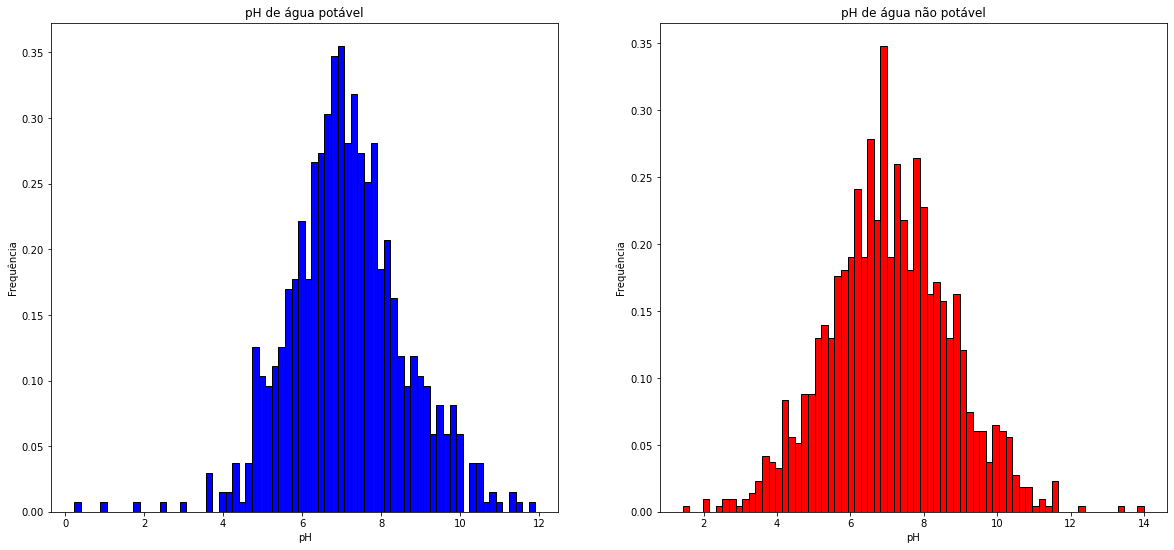

In [77]:
# iremos analisar agora alguns dos fatores, sua influência e como eles afetam a potabilidade da água
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.ph, bins = 70, edgecolor = 'black', color = 'blue', density = True)
plt.title('pH de água potável')
plt.xlabel('pH')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.ph, bins = 70, edgecolor = 'black', color = 'red',  density = True)
plt.title('pH de água não potável')
plt.xlabel('pH')
plt.ylabel('Frequência')

plt.show()

In [78]:
# Podemos observar que o pH da água potável se encontra majoritariamente no intervalo de 6 a 8
# Já o pH da água não potável possui uma distribuição mais espalhada ao longo da faixa de pH

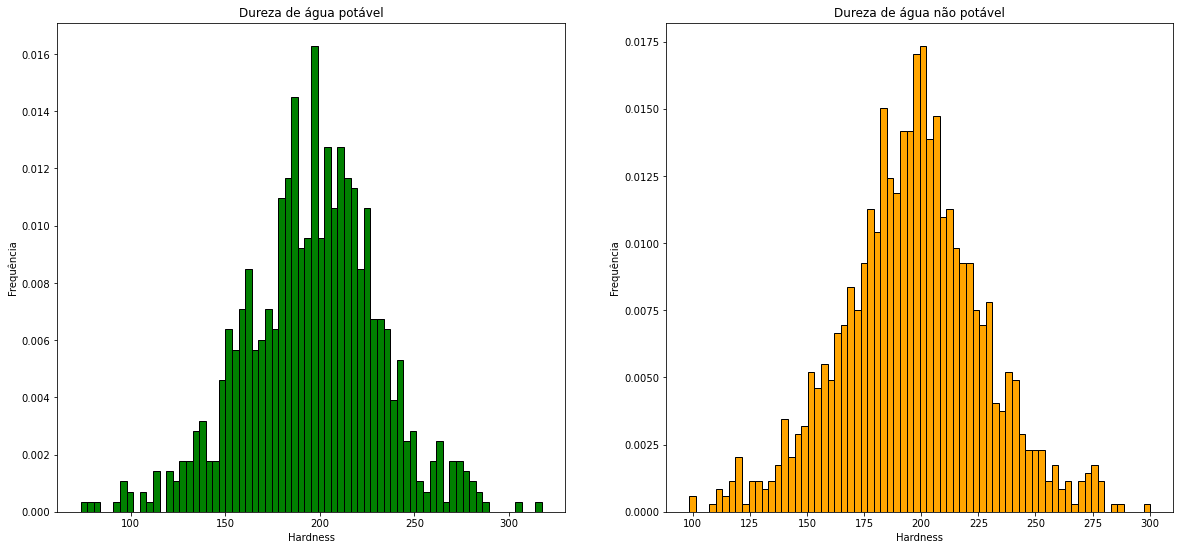

In [79]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Hardness, bins = 70, edgecolor = 'black', color = 'green', density = True)
plt.title('Dureza de água potável')
plt.xlabel('Hardness')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Hardness, bins = 70, edgecolor = 'black', color = 'orange', density = True)
plt.title('Dureza de água não potável')
plt.xlabel('Hardness')
plt.ylabel('Frequência')

plt.show()

In [80]:
# Podemos observar que a dureza da água não potável é maior que a da potável
# Sendo este um possível fator para diferenciar a potabilidade da água

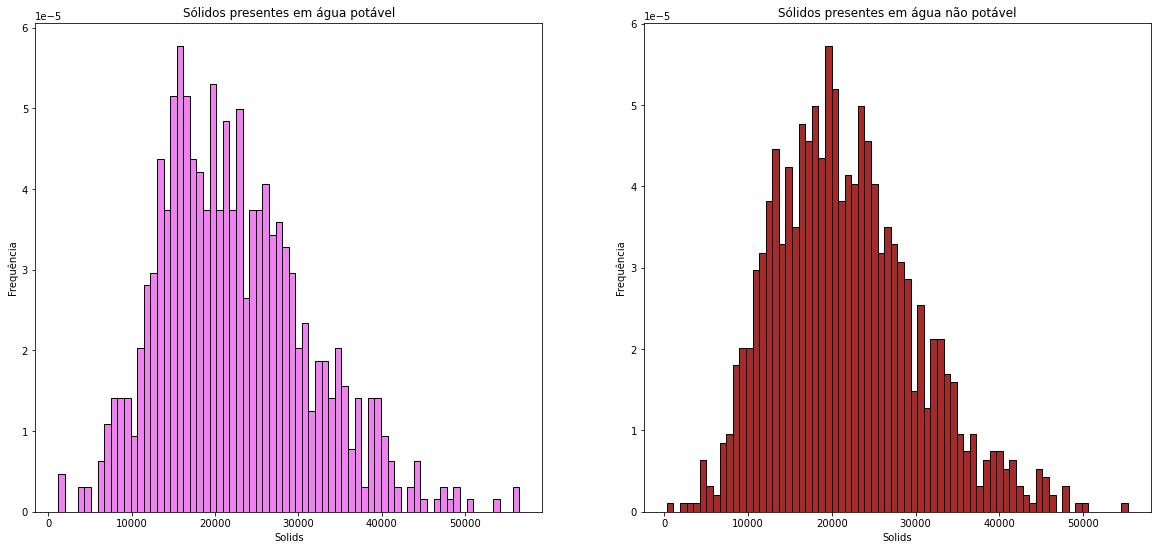

In [81]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Solids, bins = 70, edgecolor = 'black', color = 'violet', density = True)
plt.title('Sólidos presentes em água potável')
plt.xlabel('Solids')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Solids, bins = 70, edgecolor = 'black', color = 'brown', density = True)
plt.title('Sólidos presentes em água não potável')
plt.xlabel('Solids')
plt.ylabel('Frequência')

plt.show()

In [82]:
# A presença de particulas sólidas aparentemente não é um fator determinante para sabermos se a água é potável ou não.
# Pois podemos observar que ambas as ditribuições seguem um padrão semelhante 

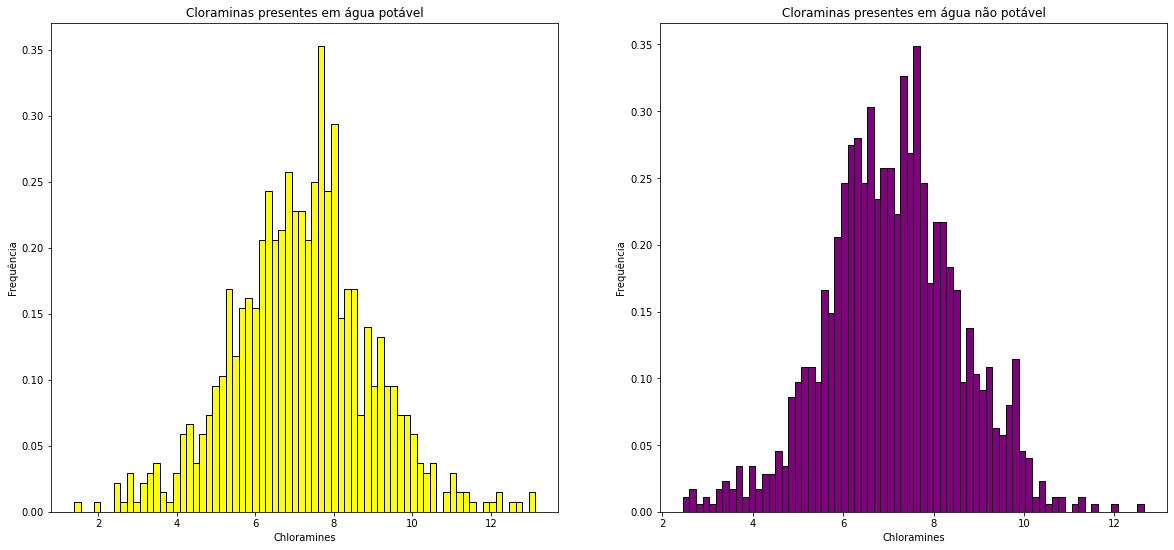

In [83]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Chloramines, bins = 70, edgecolor = 'black', color = 'yellow', density = True)
plt.title('Cloraminas presentes em água potável')
plt.xlabel('Chloramines')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Chloramines, bins = 70, edgecolor = 'black', color = 'purple', density = True)
plt.title('Cloraminas presentes em água não potável')
plt.xlabel('Chloramines')
plt.ylabel('Frequência')

plt.show()

In [84]:
# A presença de cloraminas não é um fator determinante para sabermos se a água é potável ou não.
# Pois podemos observar que ambas as ditribuições seguem um padrão semelhante 

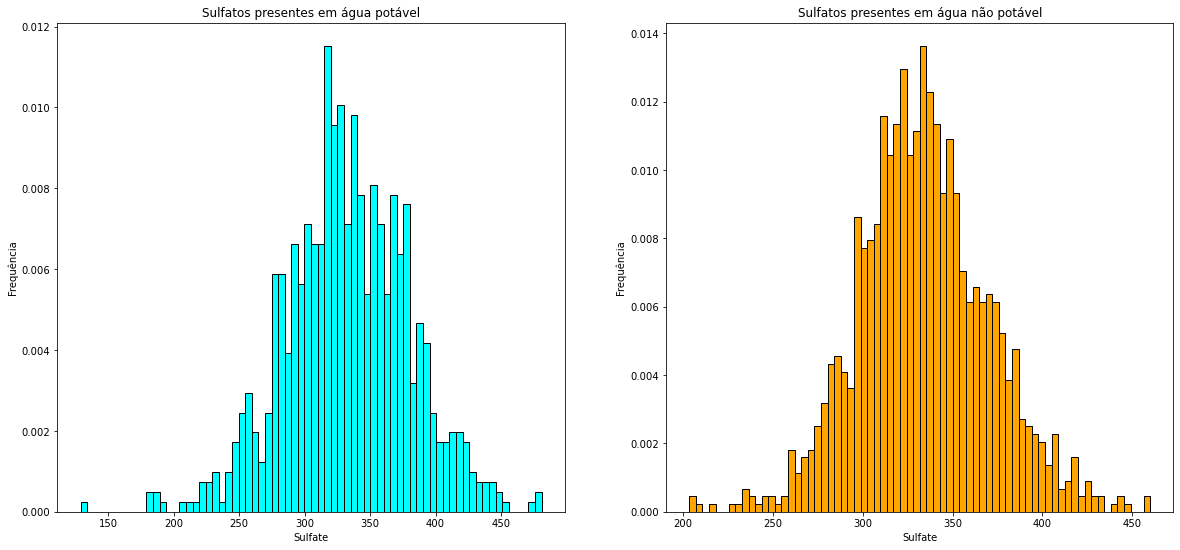

In [85]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Sulfate, bins = 70, edgecolor = 'black', color = 'cyan', density = True)
plt.title('Sulfatos presentes em água potável')
plt.xlabel('Sulfate')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Sulfate, bins = 70, edgecolor = 'black', color = 'orange', density = True)
plt.title('Sulfatos presentes em água não potável')
plt.xlabel('Sulfate')
plt.ylabel('Frequência')

plt.show()

In [86]:
# Através dos gráficos podemos observar que a frequência da presença de sulfatos é maior na água não potável
# Logo a presença de sulfatos pode ser um indicador de potabilidade 

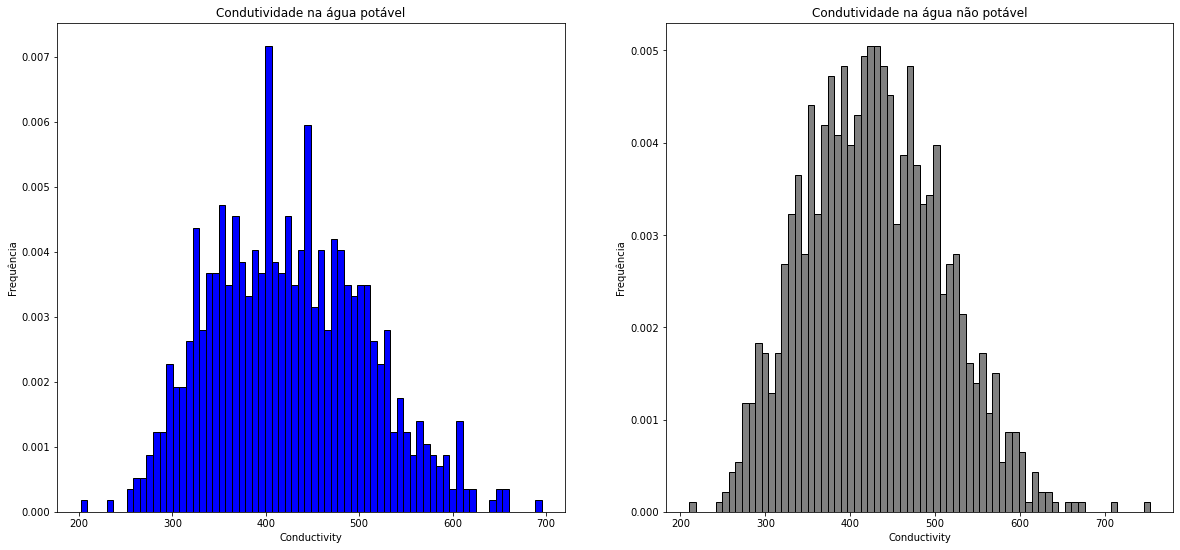

In [87]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Conductivity, bins = 70, edgecolor = 'black', color = 'blue', density = True)
plt.title('Condutividade na água potável')
plt.xlabel('Conductivity')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Conductivity, bins = 70, edgecolor = 'black', color = 'grey', density = True)
plt.title('Condutividade na água não potável')
plt.xlabel('Conductivity')
plt.ylabel('Frequência')

plt.show()

In [88]:
# Podemos observar que os gráficos de condutividade entre a água potável e não potável são bem distintos.
# Sendo que a presença de condutividade pode ser um fator para distinguir a potabilidade

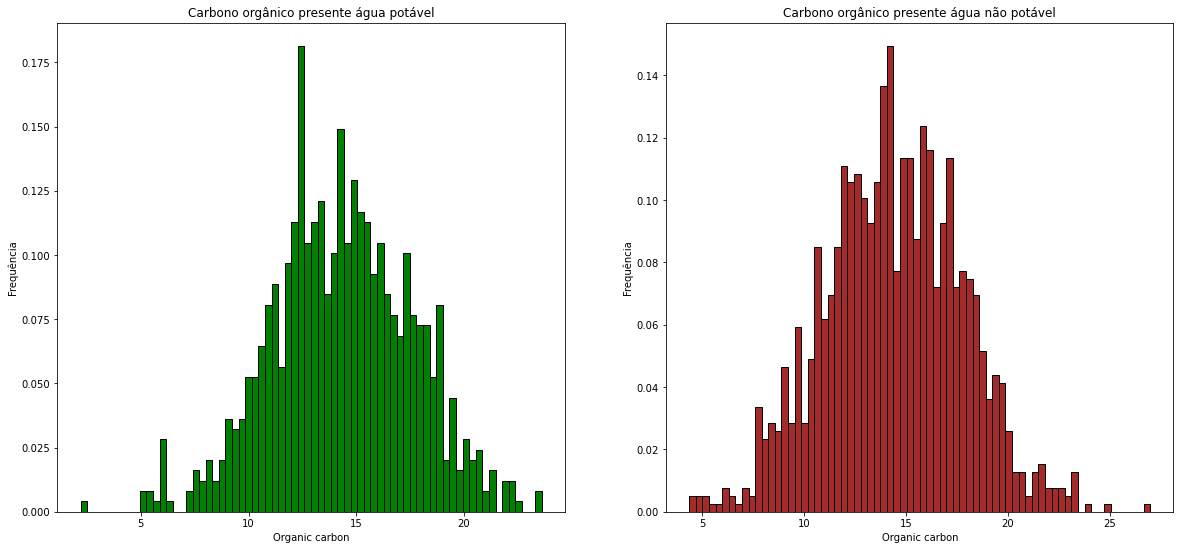

In [89]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Organic_carbon, bins = 70, edgecolor = 'black', color = 'green', density = True)
plt.title('Carbono orgânico presente água potável')
plt.xlabel('Organic carbon')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Organic_carbon, bins = 70, edgecolor = 'black', color = 'brown', density = True)
plt.title('Carbono orgânico presente água não potável')
plt.xlabel('Organic carbon')
plt.ylabel('Frequência')

plt.show()

In [90]:
# Podemos observar nos gráficos que a frequência de presença de carbono orgânico é maior na água não potável.
# Sendo este um possível fator para diferenciar a potabilidade da água

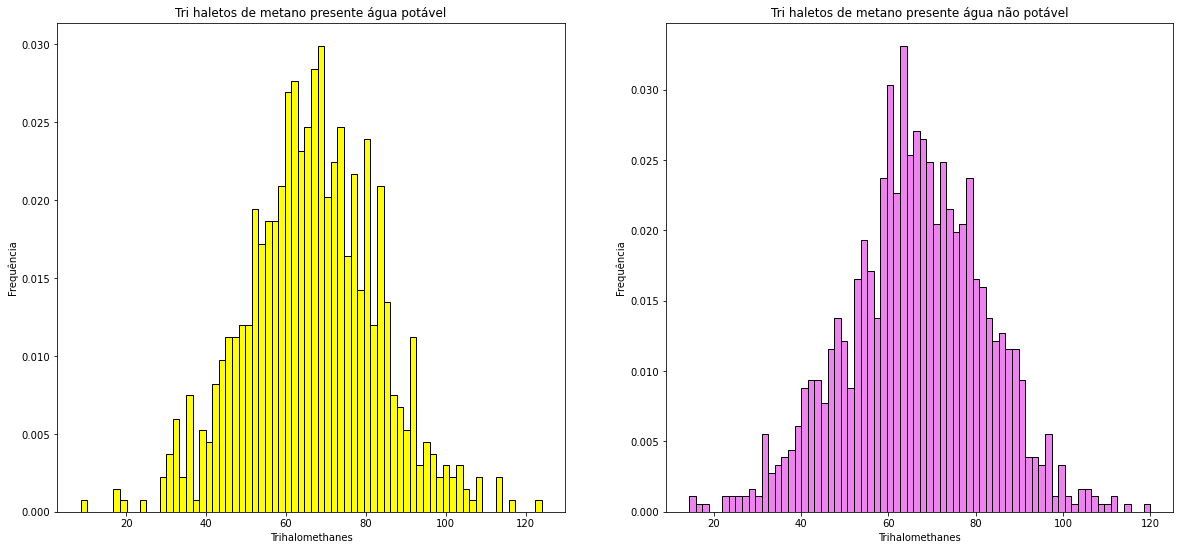

In [91]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Trihalomethanes, bins = 70, edgecolor = 'black', color = 'yellow', density = True)
plt.title('Tri haletos de metano presente água potável')
plt.xlabel('Trihalomethanes')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Trihalomethanes, bins = 70, edgecolor = 'black', color = 'violet', density = True)
plt.title('Tri haletos de metano presente água não potável')
plt.xlabel('Trihalomethanes')
plt.ylabel('Frequência')

plt.show()

In [92]:
# A presença de Tri haletos de metano não é um fator determinante para sabermos se a água é potável ou não.
# Pois podemos observar que ambas as ditribuições seguem um padrão semelhante 

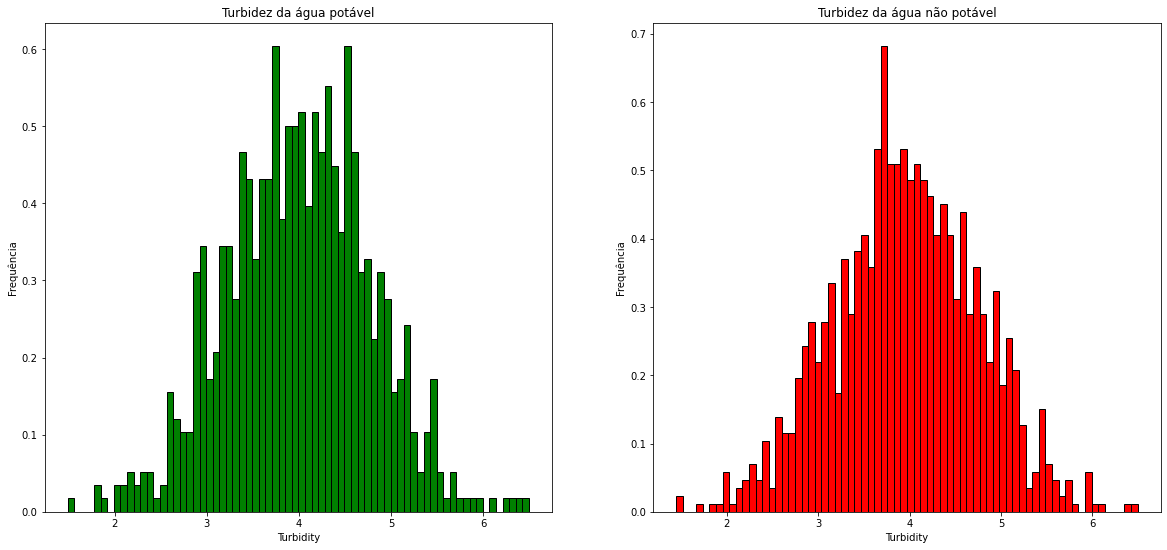

In [93]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Turbidity, bins = 70, edgecolor = 'black', color = 'green', density = True)
plt.title('Turbidez da água potável')
plt.xlabel('Turbidity')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Turbidity, bins = 70, edgecolor = 'black', color = 'red', density = True)
plt.title('Turbidez da água não potável')
plt.xlabel('Turbidity')
plt.ylabel('Frequência')

plt.show()

In [94]:
# Através dos gráficos podemos observar que a turbidez possui uma frequência maior no gráfico da água não potável
# Podendo este ser um fator determinate para analisarmos se a água é potável ou não

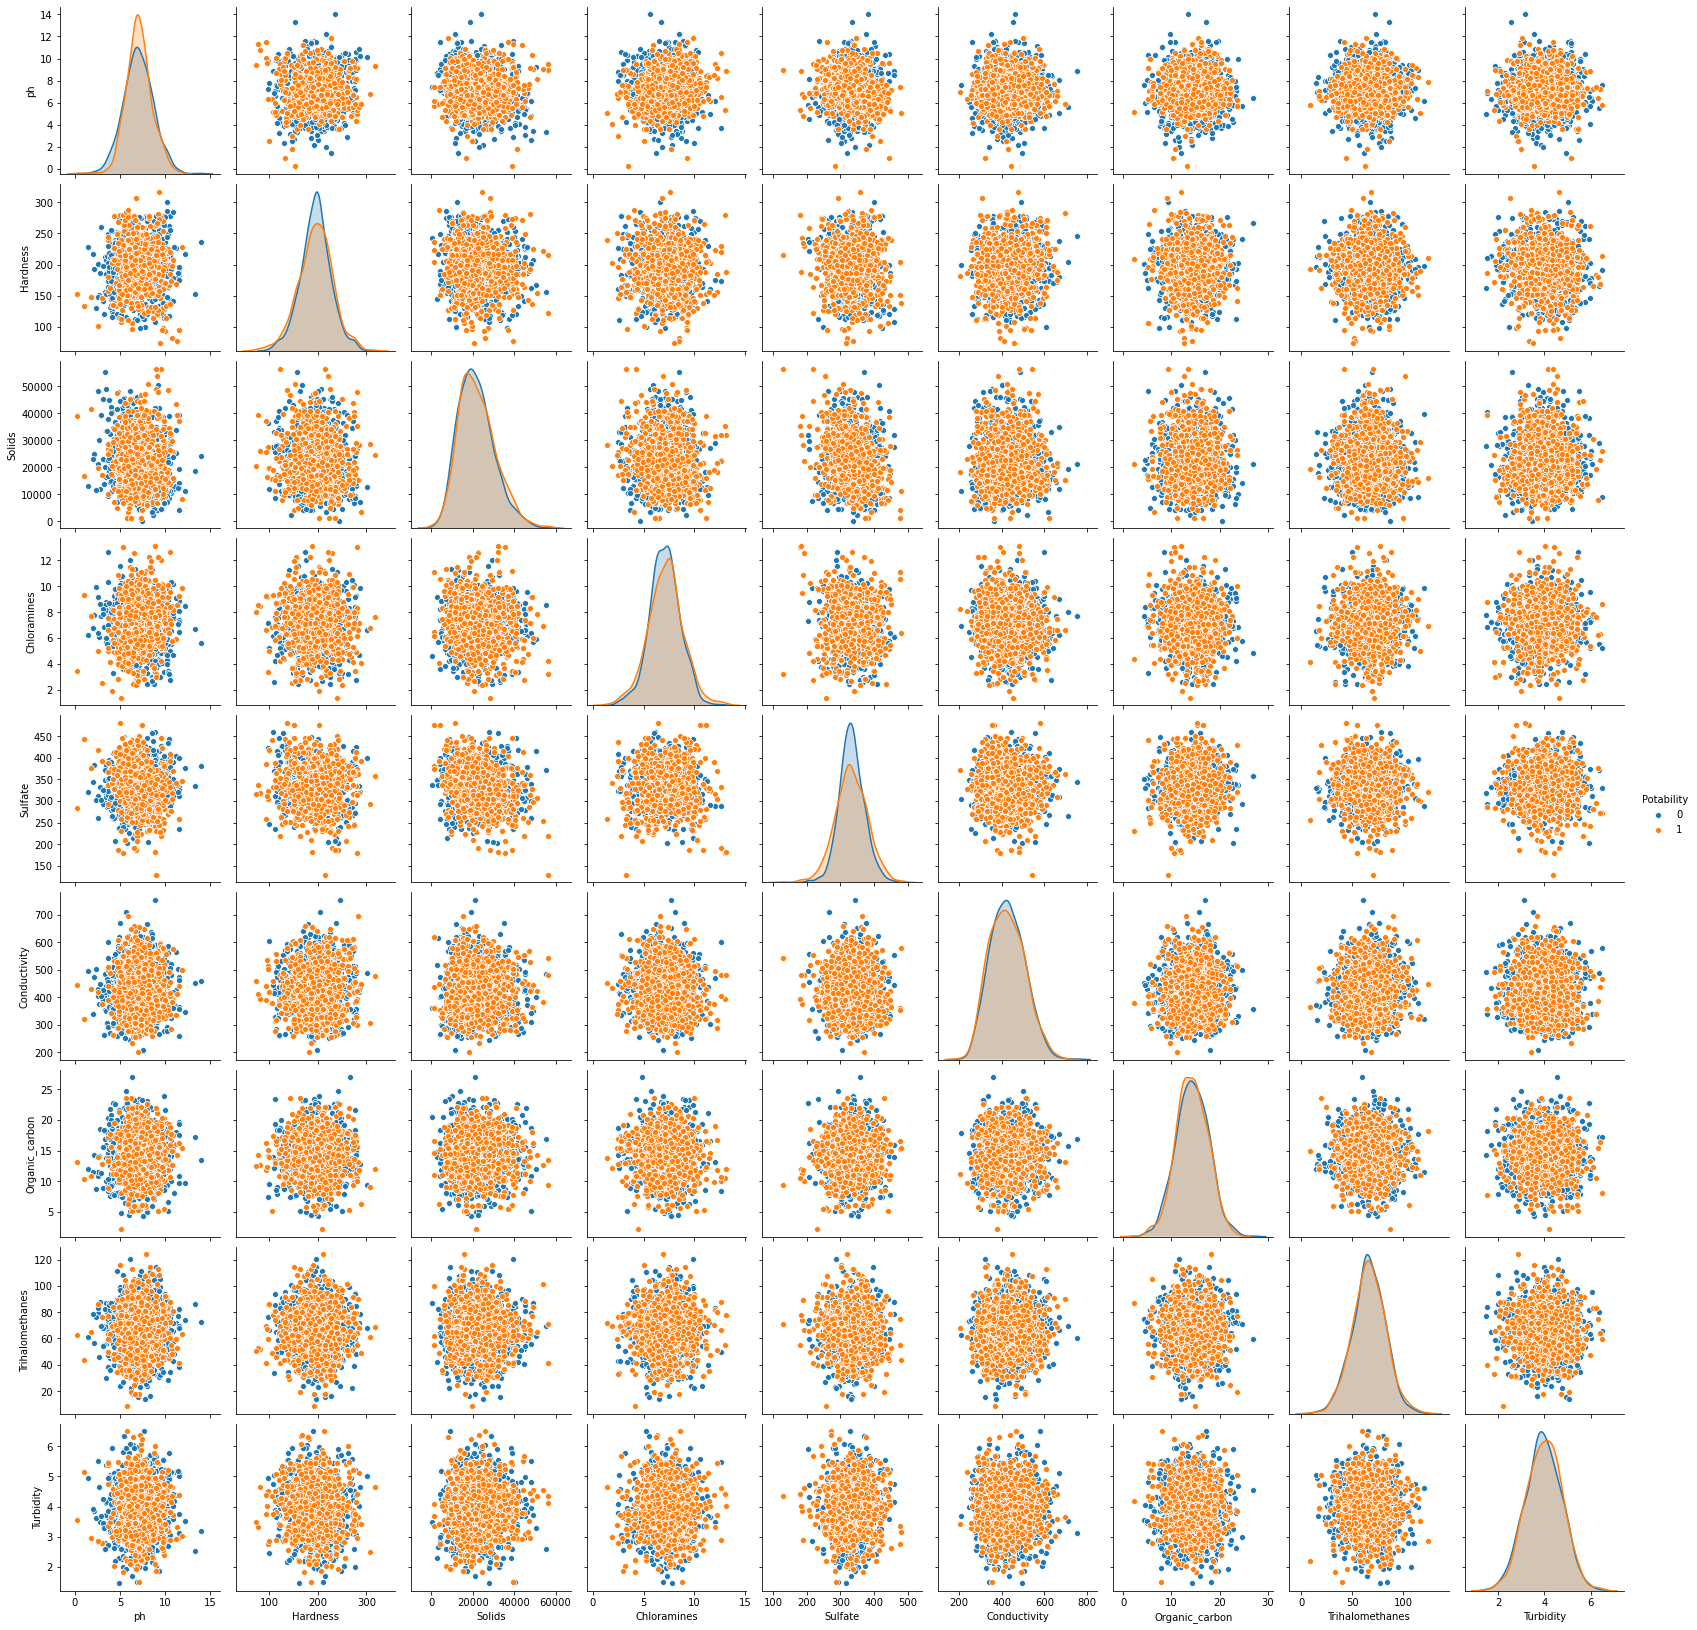

In [95]:
# df = sns.load_dataset("penguins")
sns.pairplot(dados, hue="Potability")

In [180]:
# lista =['ph', 'Hardness', //'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
#       //'Organic_carbon', //'Trihalomethanes', //'Turbidity', 'Potability']

In [181]:
'Solids', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'

('Solids', 'Organic_carbon', 'Trihalomethanes', 'Turbidity')

In [182]:
# extraindo X para base de treinamento
X = dados.iloc[:, :-1]

In [183]:
# extraindo y para base de treinamento
# TARGET
y = dados.iloc[:, -1]
y

3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64

In [184]:
# Função para gerar base de dados utilizada para treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # X todas as colunas y coluna da potabilidade
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1897,6.309892,133.649925,31062.371915,6.975602,252.108925,381.058776,17.200008,71.181544,3.603040
2383,5.153489,107.341982,19115.721861,9.296114,333.061939,457.891532,17.445656,77.598804,3.749921
1441,10.301571,199.609364,11278.829678,7.464893,433.448168,461.979286,17.099096,63.190835,3.857852
521,7.025306,202.809081,23502.857795,5.239013,335.548719,471.131716,13.891519,63.751855,5.989543
1431,6.367299,183.789491,11619.709697,6.035221,343.828015,362.775439,16.643696,73.259221,2.614766
...,...,...,...,...,...,...,...,...,...
2706,7.873272,182.646658,25337.122963,3.715065,362.484604,315.189948,12.132425,65.499925,3.306393
1098,5.895949,187.153617,37118.255436,4.600730,253.158469,531.169101,11.410184,77.286551,3.659653
2445,7.423088,210.046197,31073.031338,6.374709,312.103161,460.894212,16.805990,41.607907,3.712682
3043,6.260892,188.061805,33809.224701,8.141301,341.498044,522.301232,14.467501,47.050155,4.397386


In [185]:
# Arvore de decisão
# explicar o por que
from sklearn import tree
modelo = tree.DecisionTreeClassifier()

In [186]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [187]:
modelo.score(X_test, y_test)

0.5798192771084337

In [188]:
# Novo data frame com as colunas de interesse - excluindo colunas
Z = dados.drop(columns = ['Solids' ,'Organic_carbon', 'Trihalomethanes', 'Potability']) 
Z

,ph,Hardness,Chloramines,Sulfate,Conductivity,Turbidity
3,8.316766,214.373394,8.059332,356.886136,363.266516,4.628771
4,9.092223,181.101509,6.546600,310.135738,398.410813,4.075075
5,5.584087,188.313324,7.544869,326.678363,280.467916,2.559708
6,10.223862,248.071735,7.513408,393.663396,283.651634,2.672989
7,8.635849,203.361523,4.563009,303.309771,474.607645,4.401425
...,...,...,...,...,...,...
3267,8.989900,215.047358,6.297312,312.931022,390.410231,4.613843
3268,6.702547,207.321086,7.708117,304.510230,329.266002,3.442983
3269,11.491011,94.812545,9.263166,258.930600,439.893618,4.369264
3270,6.069616,186.659040,7.747547,345.700257,415.886955,3.669712


In [189]:
# extraindo y para base de treinamento
# TARGET
# y2 = Z.iloc[:, -1]
# y2

In [190]:
Z_train, Z_test, y2_train, y2_test = train_test_split(Z, y, test_size=0.33) # Z todas as colunas y coluna da potabilidade
Z_train

,ph,Hardness,Chloramines,Sulfate,Conductivity,Turbidity
2759,6.920449,196.319401,8.493784,317.382315,487.504368,4.498818
2427,8.025220,213.519722,7.669540,318.114395,376.314446,4.134943
1411,6.989814,221.000235,8.361019,307.523159,326.586360,4.808583
1231,2.690831,151.782906,6.053072,303.702409,377.198273,4.650034
2215,7.989376,191.936191,8.562428,312.739993,431.505677,3.648744
...,...,...,...,...,...,...
648,5.171434,207.280531,7.287925,300.254258,552.907590,2.949432
3,8.316766,214.373394,8.059332,356.886136,363.266516,4.628771
529,8.809296,226.105901,4.930381,320.799382,350.116686,3.879054
2206,8.801934,225.895468,2.458609,408.417866,446.992465,3.769832


In [191]:
modelo_2 = tree.DecisionTreeClassifier()

In [192]:
modelo_2.fit(Z_train, y2_train)

DecisionTreeClassifier()

In [194]:
modelo_2.score(Z_test, y2_test) 

0.625

In [ ]:
# regressão logística
# P>|z| quanto menor melhor, descarta os pontos que forem maior que zero